<a href="https://colab.research.google.com/github/nasha430/nasha/blob/master/%EB%B6%88%EA%B7%A0%ED%98%95_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* 불균형 데이터 처리
1. 필요 라이브러리 import
-imbalanced-learn 패키지
-imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지
- 설치 방법 : jupyter notebook 에서 !pip install imbalanced-learn 혹은 !pip install imbalanced



In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FuterWarning제거
import pandas as pd # pandas package
import numpy as np # numpy package : np.nan 이용 결측값 생성
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns # seaborn 시각화 패키지
from sklearn.datasets import make_classification # 데이터셋 생성 패키지

# 불균형 데이터 처리-언더 샘플링
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import OneSidedSelection

# 불균형 데이터 처리 - 오버 샘플링
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

# 데이터 검증
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트
from sklearn.model_selection import RepeatedStratifiedKFold # Cross-Validation
from sklearn.model_selection import cross_validate # Cross_Validation

from sklearn.preprocessing import MinMaxScaler # min-max 스케일링
from sklearn.preprocessing import StandardScaler #표준화
from scipy import stats

import matplotlib.pyplot as plt # matplotlib 시각화 패키지


# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt': # Windows OS
  font_family = "malgun Gothic"
else: # MAC OS
  font_family = "AppleGothic"

# - 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

#불균형 데이터에 처리에 딸느 랜덤포레스트 결과 확인 함수 생성
def Randomforest_Result(x, y, title):
  rf = RandomForestClassifier(criterion= 'entropy')
  # cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  cv_rf = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
  scores = cross_validate(rf, x, y, scoring='f1', cv=cv_rf, n_jobs=-1)
  print(title, ':','3-Fold CV f1 score: %.4f' % np.mean(scores['test_score']))
  return

2. Under Sampling
  1. 데이터셋 준비 및 확인

In [7]:
#데이터 셋 준비
X_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples=1000,
                                      n_features=20, weights=[0.9, 0.1], flip_y=0,
                                      n_clusters_per_class=1, random_state=10)
print(X_data.shape)
y_class.shape

(1000, 20)


(1000,)

In [10]:
# count_and_plot 그리기 함수

from collections import Counter 
from matplotlib import pyplot
def count_and_plot(y):
  counter = Counter(y)
  for k,v in counter.items():
    print('Class=%d, n=%d (%.3f%%)' % (k, v, v/ len(y) *100))
  pyplot.bar(counter.keys(), counter.values())
  pyplot.show()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


Class=0, n=900 (90.000%)
Class=1, n=100 (10.000%)


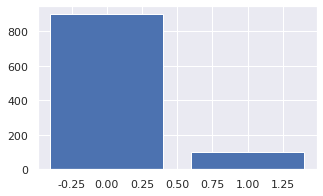

In [11]:
#데이터 셋 가시화
plt.figure(figsize=(5,3))
count_and_plot(y_class)

In [12]:
Randomforest_Result(X_data, y_class, "언더 샘플링_원본 데이터 결과")

언더 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9753


In [14]:
#sampling_strategy
#- 'majority'(소수 집단과 동일하게 샘플링)
#- 0과 1 사이의 숫자를 지정(소수 집단 데이터 수/ 다수 집단 데이터 수 )하여 샘플링
under_random = RandomUnderSampler(sampling_strategy='majority')
X_random, y_random = under_random.fit_resample(X_data, y_class)

Class=0, n=100 (50.000%)
Class=1, n=100 (50.000%)


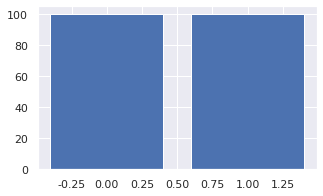

In [15]:
plt.figure(figsize= (5, 3))
count_and_plot(y_random)

In [16]:
Randomforest_Result(X_random, y_random, "언더 샘플링_랜덤언더 샘플링_데이터 결과")

언더 샘플링_랜덤언더 샘플링_데이터 결과 : 3-Fold CV f1 score: 0.9949


In [18]:
# sampling_strategy
# 0과 1사이의 숫자를 지정(소수 집단 데이터수/ 다수 집단 데이터수)하여 샘플링
under_ramdom_05 = RandomUnderSampler(sampling_strategy = 0.5)
X_random_05, y_random_05 = under_ramdom_05.fit_resample(X_data, y_class)

Class=0, n=200 (66.667%)
Class=1, n=100 (33.333%)


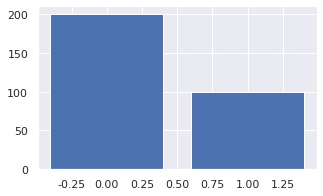

In [19]:
plt.figure(figsize=(5,3))
count_and_plot(y_random_05)

In [20]:
Randomforest_Result(X_random_05, y_random_05, "언더 샘플링_랜덤언더 샘플링_비율 : 0.5_데이터 결과")

언더 샘플링_랜덤언더 샘플링_비율 : 0.5_데이터 결과 : 3-Fold CV f1 score: 0.9949


3. TomekLinks

In [25]:
#토멕링크
tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_data, y_class)

Class=0, n=900 (90.000%)
Class=1, n=100 (10.000%)


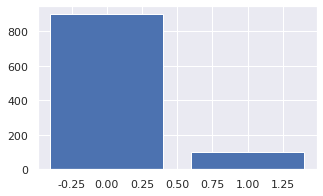

In [26]:
plt.figure(figsize= (5,3))
count_and_plot(y_tl)

In [27]:
Randomforest_Result(X_tl, y_tl, "언더 샘플링_토멕링크_데이터 결과")

언더 샘플링_토멕링크_데이터 결과 : 3-Fold CV f1 score: 0.9802


4. OSS(OneSidedSelection)

In [28]:
# OSS(OneSidedSelection)
oss= OneSidedSelection(random_state=42)
X_oss, y_oss = oss.fit_resample(X_data, y_class)

Class=0, n=607 (85.856%)
Class=1, n=100 (14.144%)


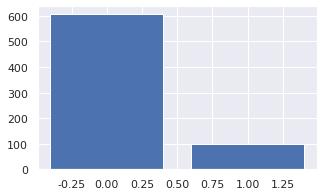

In [29]:
plt.figure(figsize=(5,3))
count_and_plot(y_oss)

In [31]:
Randomforest_Result(X_oss, y_oss, "언더 샘플링_OSS_데이터 결과")

언더 샘플링_OSS_데이터 결과 : 3-Fold CV f1 score: 0.9751


3. OverSampling
  1. 데이터셋 준비 및 확인

(1000, 20)
Class=0, n=900 (90.000%)
Class=1, n=100 (10.000%)


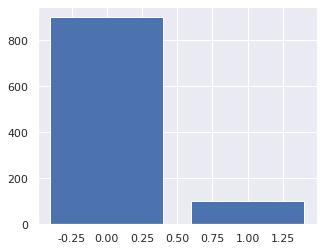

In [34]:
# 데이터셋 준비 및 확인
X_data, y_class = make_classification(n_classes=2, class_sep=2, n_samples=1000, n_features=20,
                                     weights=[0.9, 0.1], flip_y = 0,
                                     n_clusters_per_class=1, random_state=10)

print(X_data.shape)
y_class.shape

plt.figure(figsize=(5,4))
count_and_plot(y_class)

In [38]:
Randomforest_Result(X_data, y_class, "오버 샘플링_원본 데이터 결과")

오버 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9749


2. Random over sampling

In [39]:
# 랜덤 오버 샘플링
ros= RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_data, y_class)

Class=0, n=900 (50.000%)
Class=1, n=900 (50.000%)


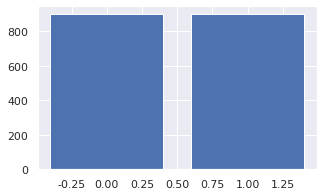

In [40]:
plt.figure(figsize=(5,3))
count_and_plot(y_ros)

In [41]:
Randomforest_Result(X_data, y_class, "오버 샘플링_랜덤오버샘플링 결과")

오버 샘플링_랜덤오버샘플링 결과 : 3-Fold CV f1 score: 0.9753


3. SMOTE

In [42]:
# SMOTE
smote =SMOTE()
X_sm, y_sm = smote.fit_resample(X_data, y_class)


Class=0, n=900 (50.000%)
Class=1, n=900 (50.000%)


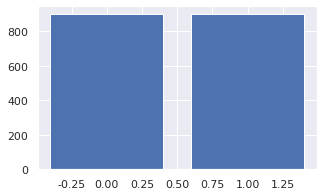

In [43]:
plt.figure(figsize=(5,3))
count_and_plot(y_sm)

In [45]:
Randomforest_Result(X_sm, y_sm, "오버 샘플링_SMOTE 결과")

오버 샘플링_SMOTE 결과 : 3-Fold CV f1 score: 0.9967


4. ADASYN

In [48]:
#ADASYN
ada = ADASYN(random_state=42)
X_ada, y_ada = ada.fit_resample(X_data, y_class)

Class=0, n=900 (50.139%)
Class=1, n=895 (49.861%)


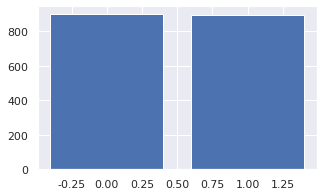

In [49]:
plt.figure(figsize=(5,3))
count_and_plot(y_ada)

In [50]:
Randomforest_Result(X_ada, y_ada, "오버 샘플링_ADASYN 결과")

오버 샘플링_ADASYN 결과 : 3-Fold CV f1 score: 0.9967


5. Boderline SMOTE

In [51]:
# Boderline SMOTE
bor_sm = BorderlineSMOTE(random_state=42)
X_bor_sm, y_bor_sm = bor_sm.fit_resample(X_data, y_class)

Class=0, n=900 (50.000%)
Class=1, n=900 (50.000%)


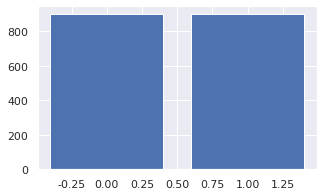

In [53]:
plt.figure(figsize=(5,3))
count_and_plot(y_bor_sm)

In [57]:
Randomforest_Result(X_bor_sm, y_bor_sm, "오버 샘플링_Boderline SMOTE결과")

오버 샘플링_Boderline SMOTE결과 : 3-Fold CV f1 score: 0.9967
